# Cleaning The Metropolitan Museum of Art Open Access dataset

The Metropolitan Museum of Art presents over 5,000 years of art from around the world.

The Metropolitan Museum of Art provides select datasets of information on more than 480,000 artworks in its Collection. This work is published from: The United States Of America. The datasets support the search, use, and interaction with the Museum’s collection.

At this time, the datasets are available in CSV format, encoded in UTF-8.

Issues: Missing values, inconsistent information, missing documentation, possible duplication, mixed text and numeric data.

## Importing Libraries

In [102]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

numpy version: 1.26.4
pandas version: 2.1.4
scikit-learn version: 1.2.2
matplotlib version: 3.8.0


## Loading the data source

In [103]:
df_met_objects = pd.read_csv('openaccess/MetObjects.csv', low_memory=False)

## Explore dataset

In [104]:
df_met_objects.info()
df_met_objects.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
count,484956,484956,484956,484956,484956.000000,49541,484956,481094,482690,456153,...,2092,406239,24529,484956,69154,0.0,484956,192455,192455,192455
unique,481656,2,2,2,NaN,379,19,180,28631,245800,...,228,1244,1507,484956,69076,NaN,1,44171,43699,43886
top,62.635,False,False,True,NaN,774,Drawings and Prints,1963,Print,Terracotta fragment of a kylix (drinking cup),...,Upper Sepik River,Prints,"© Walker Evans Archive, The Metropolitan Museu...",http://www.metmuseum.org/art/collection/search/1,https://www.wikidata.org/wiki/Q97732991,NaN,"Metropolitan Museum of Art, New York, NY",Flowers,http://vocab.getty.edu/page/aat/300132399,https://www.wikidata.org/wiki/Q506
freq,4,482179,476977,248472,NaN,7547,172630,41980,102986,6415,...,362,84326,7364,1,17,NaN,484956,8543,8543,8543
mean,NaN,NaN,NaN,NaN,394499.940353,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,242732.561637,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,212379.750000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,374771.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,570971.250000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning dataset

### Renaming columns

In [105]:
# Rename columns to lowercase and replace whitespace with underscores
df_met_objects.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

# accession_year was formatted as Pascal, so it needed manual separation
df_met_objects.rename(columns={'accessionyear': 'accession_year'}, inplace=True)

### Drop uninterested columns
- Dataset contains more representations for one value; 'state'/'county', 'object_date'/'object_begin_date','object_end_date'
- Links/URL is not interesting; 'artist_ulan_url', 'artist_wikidata_url', 'link_resource', 'object_wikidata_url', 'tags_aat_url', 'tags_wikidata_url'
- IDs are not interesting; 'object_number', 'constituent_id'
- Column is empty; 'metadata_date'

In [106]:
df_met_objects.drop(inplace=True, columns=['object_number', 'constituent_id', 'artist_prefix', 'artist_suffix', 'artist_ulan_url', 'artist_wikidata_url', 'artist_alpha_sort', 'geography_type', 'state', 'object_date', 'rights_and_reproduction', 'link_resource', 'object_wikidata_url', 'metadata_date', 'repository', 'tags', 'tags_aat_url', 'tags_wikidata_url' ])

### Convert types
- Most column types are object but they are strings
- Column 'gallery_number' has different units for the same variable; number/string

In [107]:
# TODO dtypes, Transform | character
# Suggestion gender decider based on name if the value is NaN

# Get columns with dtype 'object'
object_columns = df_met_objects.select_dtypes(include=['object']).columns

# Convert selected object columns to pd.StringDtype
df_met_objects[object_columns] = df_met_objects[object_columns].astype(pd.StringDtype())

df_met_objects.gallery_number = pd.to_numeric(df_met_objects.gallery_number, downcast='unsigned', errors='coerce')
df_met_objects.accession_year = pd.to_datetime(df_met_objects.accession_year, format='mixed')

df_met_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   is_highlight         484956 non-null  bool          
 1   is_timeline_work     484956 non-null  bool          
 2   is_public_domain     484956 non-null  bool          
 3   object_id            484956 non-null  int64         
 4   gallery_number       49504 non-null   UInt16        
 5   department           484956 non-null  string        
 6   accession_year       481094 non-null  datetime64[ns]
 7   object_name          482690 non-null  string        
 8   title                456153 non-null  string        
 9   culture              208190 non-null  string        
 10  period               91143 non-null   string        
 11  dynasty              23201 non-null   string        
 12  reign                11236 non-null   string        
 13  portfolio     

In [108]:
df_met_objects.head(450)

,is_highlight,is_timeline_work,is_public_domain,object_id,gallery_number,department,accession_year,object_name,title,culture,...,city,county,country,region,subregion,locale,locus,excavation,river,classification
0,False,False,False,1,<NA>,The American Wing,1979-01-01,Coin,One-dollar Liberty Head Coin,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,False,False,False,2,<NA>,The American Wing,1980-01-01,Coin,Ten-dollar Liberty Head Coin,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,False,False,False,3,<NA>,The American Wing,1967-01-01,Coin,Two-and-a-Half Dollar Coin,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,False,False,False,4,<NA>,The American Wing,1967-01-01,Coin,Two-and-a-Half Dollar Coin,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,False,False,False,5,<NA>,The American Wing,1967-01-01,Coin,Two-and-a-Half Dollar Coin,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,False,False,True,505,774,The American Wing,1967-01-01,Berry dish,Berry Dish,American,...,Sandwich,<NA>,United States,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
446,False,False,True,506,774,The American Wing,1968-01-01,Spoon,Berry Spoon,American,...,New York,<NA>,United States,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
447,False,False,True,507,<NA>,The American Wing,1910-01-01,Betty lamp,Betty Lamp,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
448,False,False,True,508,774,The American Wing,1934-01-01,Betty lamp,Betty Lamp,American,...,<NA>,<NA>,United States,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


(array([  6261.,   3536.,   3683.,   6227.,   3446.,   5183.,   7472.,
         47882., 119389., 213708.]),
 array([1.0000e+00, 2.0310e+02, 4.0520e+02, 6.0730e+02, 8.0940e+02,
        1.0115e+03, 1.2136e+03, 1.4157e+03, 1.6178e+03, 1.8199e+03,
        2.0220e+03]),
 <BarContainer object of 10 artists>)

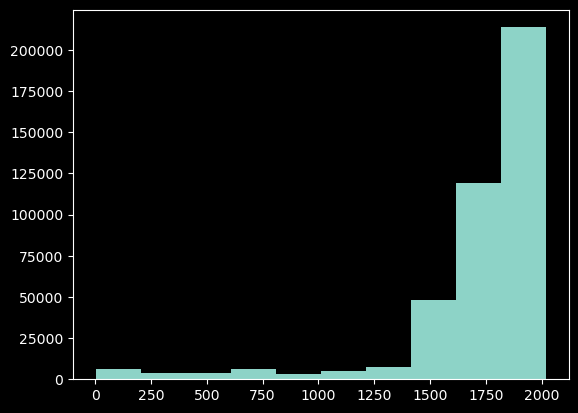

In [109]:
datez = df_met_objects.query('object_begin_date > 0 & object_begin_date < 2024 & object_end_date < 2024')
datex = df_met_objects.query('object_begin_date > 0 & object_begin_date < 1375 & object_end_date < 1375')
datey = df_met_objects.query('object_begin_date > 1375 & object_begin_date < 2024 & object_end_date > 1375 & object_end_date < 2024')
plt.style.use('dark_background')
plt.hist(datez.object_begin_date)

(array([4213., 2239., 3216., 1848., 2263., 5394., 1523., 1230., 3433.,
        1233.]),
 array([1.0000e+00, 1.3830e+02, 2.7560e+02, 4.1290e+02, 5.5020e+02,
        6.8750e+02, 8.2480e+02, 9.6210e+02, 1.0994e+03, 1.2367e+03,
        1.3740e+03]),
 <BarContainer object of 10 artists>)

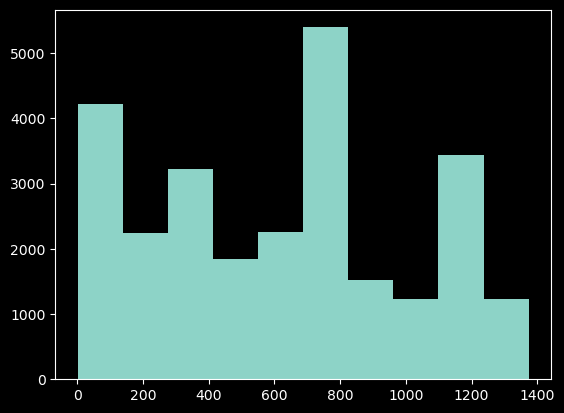

In [110]:
plt.hist(datex.object_begin_date)

(array([ 3712., 10803., 14030., 28205., 15733., 41112., 63021., 87753.,
        88912., 30814.]),
 array([1376. , 1440.6, 1505.2, 1569.8, 1634.4, 1699. , 1763.6, 1828.2,
        1892.8, 1957.4, 2022. ]),
 <BarContainer object of 10 artists>)

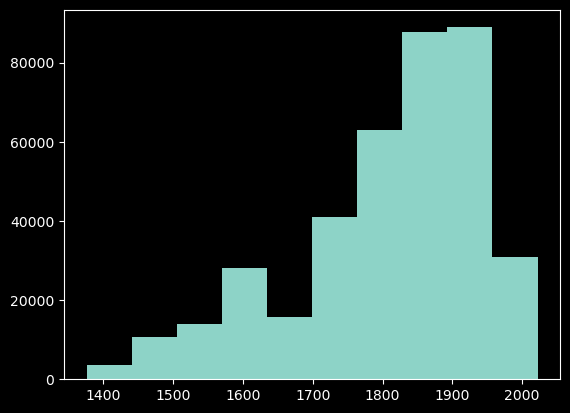

In [113]:
plt.hist(datey.object_begin_date)

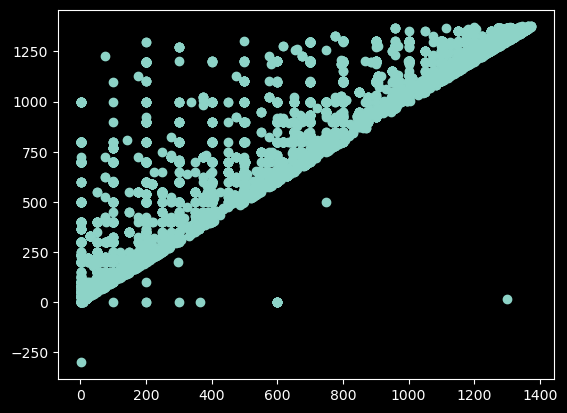

In [112]:
ww = datex[['object_begin_date', 'object_end_date']]
plt.scatter(ww.object_begin_date, y=ww.object_end_date)